<a href="https://colab.research.google.com/github/patel-star/Gen-AI/blob/main/LSTMs_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import datetime as dt
from datetime import date

In [3]:
scrip = 'MSFT'
data = yf.download(scrip, '2021-01-01', date.today().strftime('%Y-%m-%d'))
data.head()
data.info()

/tmp/ipython-input-3-2250125035.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(scrip, '2021-01-01', date.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2021-01-04 to 2025-06-23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1122 non-null   float64
 1   (High, MSFT)    1122 non-null   float64
 2   (Low, MSFT)     1122 non-null   float64
 3   (Open, MSFT)    1122 non-null   float64
 4   (Volume, MSFT)  1122 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 52.6 KB


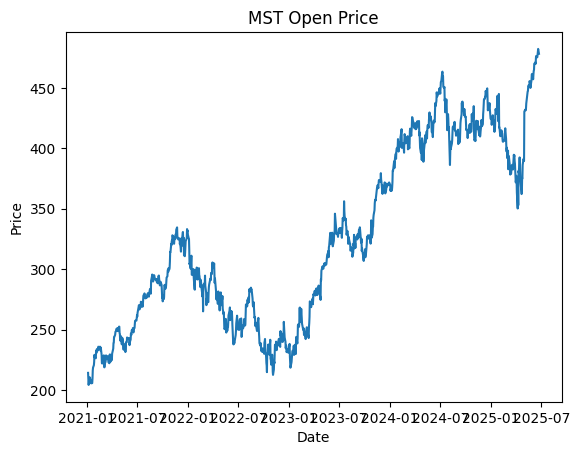

In [4]:
plt.title('MST Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data['Open'])

In [5]:
dma100 = data.Open.rolling(window=100).mean()
dma100.head()

Ticker,MSFT
Date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-08,NaN


Text(0.5, 1.0, 'MSFT open price and 100-DMa')

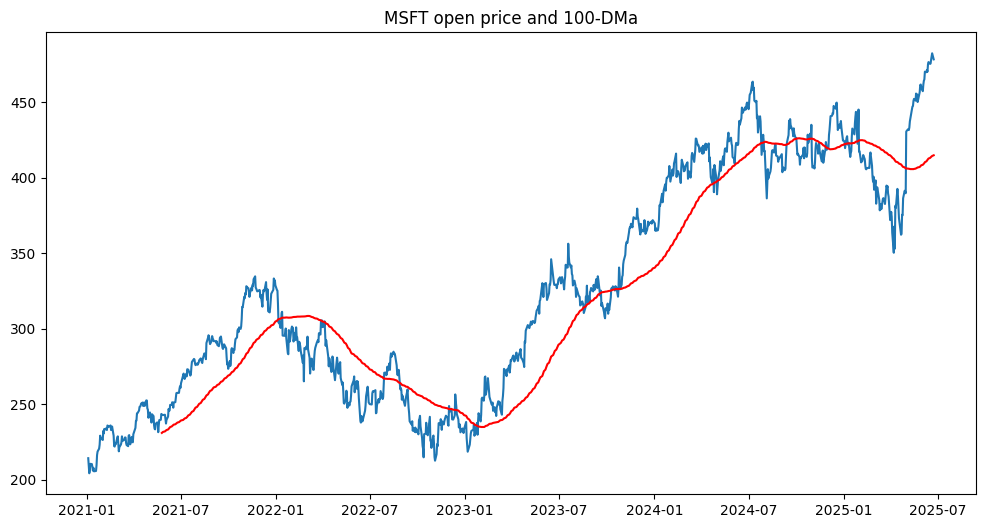

In [6]:
# plot Moving average with actual value

plt.figure(figsize=(12,6))
plt.plot(data.Open)
plt.plot(dma100,'red')
plt.title('MSFT open price and 100-DMa')

In [7]:
dma200 = data.Open.rolling(window=200).mean()
dma200.head()

Ticker,MSFT
Date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-08,NaN


Text(0.5, 1.0, 'MSFT open price and 200-DMA')

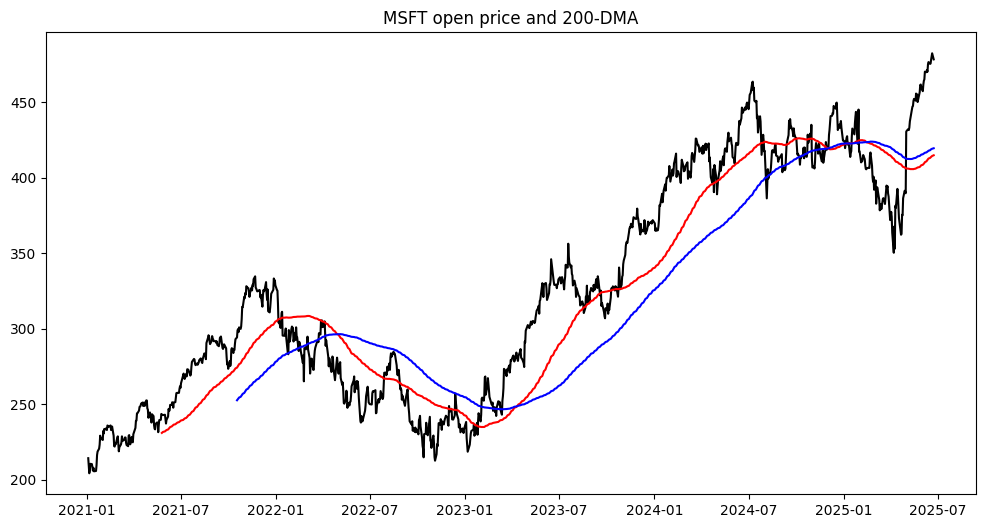

In [8]:
# Plot moving average with actual value

plt.figure(figsize=(12,6))
plt.plot(data.Open,'black')
plt.plot(dma100,'red')
plt.plot(dma200, 'blue')
plt.title('MSFT open price and 200-DMA')

In [9]:
train = pd.DataFrame(data[0: int(len(data)*0.7)])
test = pd.DataFrame(data[int(len(data)*0.7): int(len(data))])

print(train.shape)
print(test.shape)

(785, 5)
(337, 5)


In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [11]:
train_open = train.Open.values
test_open = test.Open.values

In [12]:
data_train = sc.fit_transform(train_open)
data_train

array([[0.04715867],
       [0.02316974],
       [0.        ],
       [0.00851248],
       [0.02963356],
       [0.02867764],
       [0.01971018],
       [0.00842134],
       [0.0170246 ],
       [0.00614543],
       [0.00719229],
       [0.02517251],
       [0.05703652],
       [0.06787024],
       [0.07715622],
       [0.08962874],
       [0.11757785],
       [0.10669868],
       [0.10842851],
       [0.104195  ],
       [0.13259922],
       [0.12472452],
       [0.13878991],
       [0.13683265],
       [0.1410204 ],
       [0.13519391],
       [0.14944164],
       [0.14844032],
       [0.14457098],
       [0.14957824],
       [0.13522053],
       [0.13741043],
       [0.14630703],
       [0.11742683],
       [0.08507873],
       [0.08361891],
       [0.09306328],
       [0.09055399],
       [0.11049176],
       [0.1155561 ],
       [0.09342824],
       [0.06869965],
       [0.08138337],
       [0.08982404],
       [0.09671313],
       [0.11551056],
       [0.10620304],
       [0.101

In [13]:
x_train = []
y_train = []

for i in range(100, data_train.shape[0]):
  x_train.append(data_train[i-100:i])
  y_train.append(data_train[i])

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
print(x_train.shape)
print(y_train.shape)

(685, 100, 1)
(685, 1)


In [15]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [16]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(units = 100, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units = 50, activation = 'relu', return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=120, activation = 'relu'))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
LSTM_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 120)            │        82,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,201 (598.44 KB)

 Trainable params: 153,201 (598.44 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MAE'])
LSTM_model.fit(x_train, y_train, epochs = 40)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - MAE: 0.2776 - loss: 0.1147
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - MAE: 0.0903 - loss: 0.0127
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - MAE: 0.0678 - loss: 0.0071
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 336ms/step - MAE: 0.0658 - loss: 0.0065
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - MAE: 0.0660 - loss: 0.0066
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - MAE: 0.0606 - loss: 0.0057
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - MAE: 0.0589 - loss: 0.0056
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - MAE: 0.0584 - loss: 0.0054
Epoch 9/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - MAE: 0.0569 - loss: 0.0051
Epoch 10/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - MAE: 0.0608 - loss: 0.0062
Epoch 11/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - MAE: 0.0590 - loss: 0.0055
Epoch 12/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - MAE: 0.0512 - loss: 0.0041
Epoch 13/40
22/22 ━━━

In [19]:
test_open_df = pd.DataFrame(test_open, columns=['Open'])

In [20]:
past_100_days = pd.DataFrame(train_open[-100:])
final_df = pd.concat([past_100_days,test_open_df], ignore_index = True)
final_df
sc.fit_transform(final_df)     #scale final_df

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [21]:
x_test = []
y_test = []

for i in range(100, final_df.shape[0]):
  x_test.append(final_df[i-100:i])
  y_test.append(final_df[i: 0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(337, 100, 2)
(337, 0, 2)


In [22]:
y_pred = LSTM_model.predict(x_test)

ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 2 and 1 for '{{node sequential_1/lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/lstm_1/strided_slice_1, sequential_1/lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [32,2], [1,400].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(32, 2), dtype=float32)
  • states=('tf.Tensor(shape=(32, 100), dtype=float32)', 'tf.Tensor(shape=(32, 100), dtype=float32)')
  • training=False

In [23]:
y_pred.shape

NameError: name 'y_pred' is not defined

In [24]:
scale_factor = 1/0.0098
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined